# Classificazione del Dataset Iris tramite k-NN

In questo notebook, esploreremo il famoso dataset Iris e utilizzeremo l'algoritmo k-Nearest Neighbors (k-NN) per classificare le diverse specie di fiori presenti nel dataset.

## Descrizione del Dataset Iris

Il dataset Iris è uno dei dataset più noti nel campo dell'apprendimento automatico e contiene informazioni su tre diverse specie di iris (Iris setosa, Iris versicolor e Iris virginica). Il dataset include 150 osservazioni con quattro caratteristiche ciascuna:
- Lunghezza del sepalo (cm)
- Larghezza del sepalo (cm)
- Lunghezza del petalo (cm)
- Larghezza del petalo (cm)

Ogni riga nel dataset rappresenta una singola osservazione di un fiore, e ogni fiore è etichettato con una delle tre specie possibili.

In [1]:
# Importazione delle librerie necessarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

# Caricamento del dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Creazione di un DataFrame per una migliore visualizzazione
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Visualizzazione delle prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione del modello k-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Addestramento del modello
knn.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = knn.predict(X_test)

Matrice di confusione:


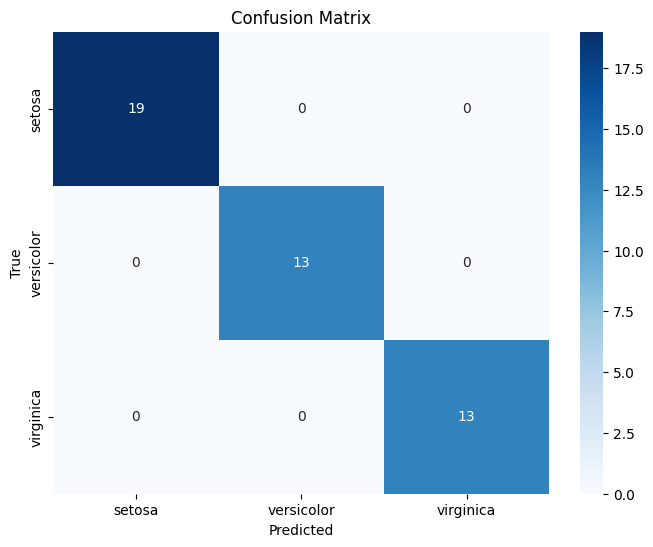

In [3]:
# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice di confusione:')

# Visualizzazione della matrice di confusione tramite heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [4]:
# Report di classificazione
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Report di classificazione:')
print(class_report)

Report di classificazione:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Report di classificazione:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



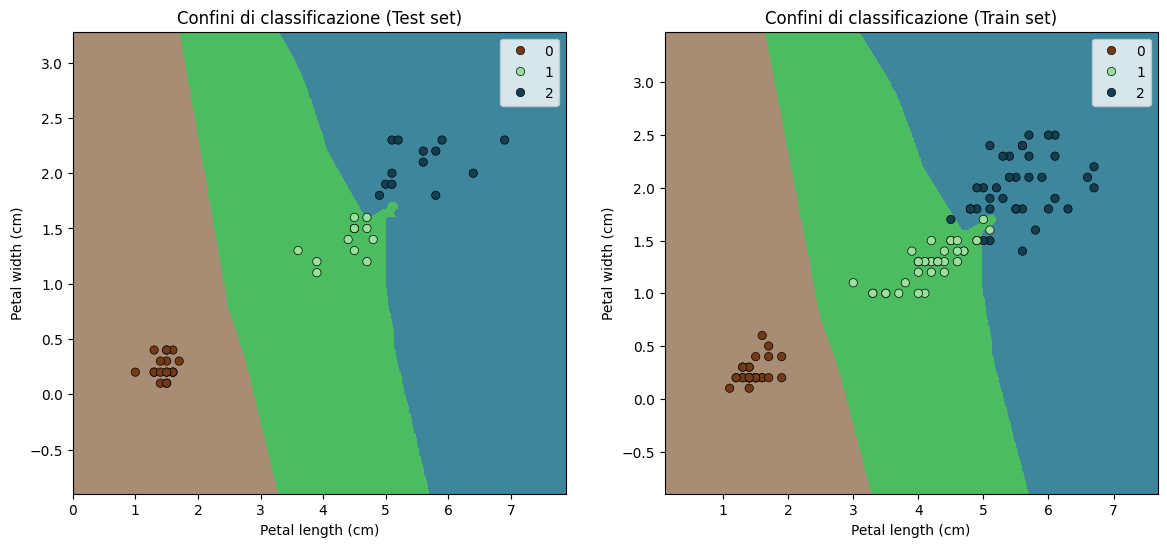

In [6]:
# Caricare il dataset iris
iris = load_iris()
X = iris.data[:, 2:4]  # Utilizziamo petal length e petal width per una visualizzazione 2D
y = iris.target

# Divisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creazione del modello k-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Addestramento del modello
knn.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = knn.predict(X_test)

# Funzione per visualizzare i confini di classificazione
def plot_decision_boundaries(X, y, model, ax, title):
    h = .02  # step size in the mesh
    # Create color maps
    cmap_light = ListedColormap(['#a88c74', '#4bbd60', '#3e869c'])
    cmap_bold = ['#733a17', '#99e09a', '#133f52']

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light)

    # Also plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="k", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Petal length (cm)')
    ax.set_ylabel('Petal width (cm)')

# Report di classificazione
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Report di classificazione:')
print(class_report)

# Creare la figura e gli assi per i subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot dei dati di train con i confini di classificazione
plot_decision_boundaries(X_train, y_train, knn, axs[1], "Confini di classificazione (Train set)")

# Plot dei dati di test con i confini di classificazione
plot_decision_boundaries(X_test, y_test, knn, axs[0], "Confini di classificazione (Test set)")

plt.show()